In [56]:
# Context :
# A chit fund has 25 members. Each month they contribute Rs 2000 each. 
# End of the month, the person who bids the lowest for the corpus, gets his bid. 
# The group organizer gets paid a fixed commission of Rs 2500 each month (5% of 25*2000).It is deducted from the bid winner's corpus.  The remaining amount is distributed among all the 25 customers equally.

# Enclosed excel has the table with cashflows for each month.
 
# Task : 
# 	•	What is the Annualized  Return of the person who bids in the last month ? 
# 	•	What is the Annualized Return of the person who bids in the first month ?
# 	•	Write an R/Python script which calculates the annualized return of chit fund participant 
# ?- Show the Return % for each month's bid winner.
 
# Document your assumptions.
# Note: Please google about how chitfund works, incase if you are not familiar with the mechanism! 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('./chitFund.csv')

In [59]:
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400


In [60]:
data.columns

Index(['Month', 'Contribution', 'Amount won by the bidder',
       'Chit fund organizer commission', 'Net amount recd by Bid winner',
       'Amount returned to everyone in the group'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
Month                                       25 non-null int64
Contribution                                25 non-null int64
Amount won by the bidder                    25 non-null int64
Chit fund organizer commission              25 non-null int64
Net amount recd by Bid winner               25 non-null int64
Amount returned to everyone in the group    25 non-null int64
dtypes: int64(6)
memory usage: 1.2 KB


In [62]:
data.shape

(25, 6)

In [63]:
# a = sum of amount returned to everyone in the group
# b = net amount received by the bid winner
# c = sum of contribution(50000) - a
a = data['Amount returned to everyone in the group'].sum(axis=0)
print(a)


6200


In [64]:
# b = net amount received by the bid winner
b = data['Net amount recd by Bid winner']
print(b)

0     37500
1     39500
2     42500
3     45500
4     37500
5     39500
6     40500
7     41500
8     37500
9     39500
10    42500
11    45500
12    37500
13    39500
14    40500
15    40500
16    38500
17    39500
18    42500
19    42500
20    41500
21    43500
22    44500
23    45500
24    47500
Name: Net amount recd by Bid winner, dtype: int64


In [65]:
# c = sum of contribution - a(sum of amount returned to everyone in the group)
amont = 50000
c = 50000 - a
print(c)

43800


In [66]:
# x = net amount received by the bid winner - sum of contribution
x = b - c
print(x)


0    -6300
1    -4300
2    -1300
3     1700
4    -6300
5    -4300
6    -3300
7    -2300
8    -6300
9    -4300
10   -1300
11    1700
12   -6300
13   -4300
14   -3300
15   -3300
16   -5300
17   -4300
18   -1300
19   -1300
20   -2300
21    -300
22     700
23    1700
24    3700
Name: Net amount recd by Bid winner, dtype: int64


In [67]:
# y = ((x / sum of contribution - sum of amount returned to everyone in the group)* 100)
y = ((x /c) * 100)
print(y)

0    -14.383562
1     -9.817352
2     -2.968037
3      3.881279
4    -14.383562
5     -9.817352
6     -7.534247
7     -5.251142
8    -14.383562
9     -9.817352
10    -2.968037
11     3.881279
12   -14.383562
13    -9.817352
14    -7.534247
15    -7.534247
16   -12.100457
17    -9.817352
18    -2.968037
19    -2.968037
20    -5.251142
21    -0.684932
22     1.598174
23     3.881279
24     8.447489
Name: Net amount recd by Bid winner, dtype: float64


In [68]:
print(type(y))
y_df  = pd.DataFrame(y)
print(type(y_df))
data2 = data.assign(Percentage = y)
data2.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Percentage
0,1,2000,40000,2500,37500,400,-14.383562
1,2,2000,42000,2500,39500,320,-9.817352
2,3,2000,45000,2500,42500,200,-2.968037
3,4,2000,48000,2500,45500,80,3.881279
4,5,2000,40000,2500,37500,400,-14.383562


([<matplotlib.axis.YTick at 0xb555610>,
 <a list of 26 Text yticklabel objects>)

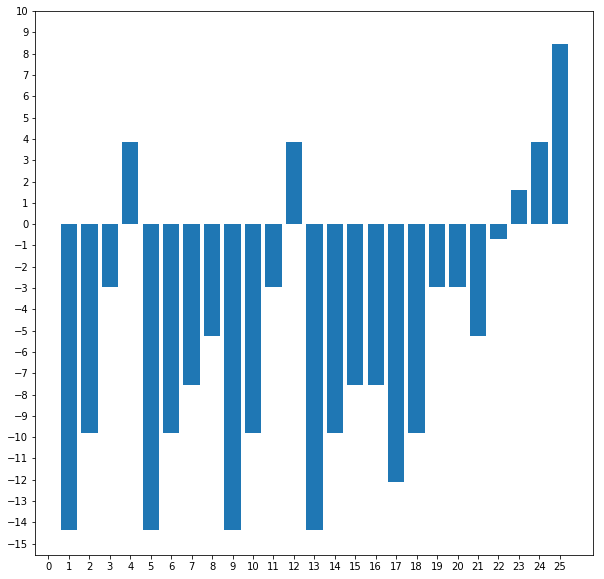

In [69]:
x = data2['Month']
y = data2['Percentage']
plt.figure(figsize=(10,10))
plt.bar(x, y )
plt.xticks(np.arange(0,26,1))
plt.yticks(np.arange(-15,11,1))

In [70]:
data2

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Percentage
0,1,2000,40000,2500,37500,400,-14.383562
1,2,2000,42000,2500,39500,320,-9.817352
2,3,2000,45000,2500,42500,200,-2.968037
3,4,2000,48000,2500,45500,80,3.881279
4,5,2000,40000,2500,37500,400,-14.383562
5,6,2000,42000,2500,39500,320,-9.817352
6,7,2000,43000,2500,40500,280,-7.534247
7,8,2000,44000,2500,41500,240,-5.251142
8,9,2000,40000,2500,37500,400,-14.383562
9,10,2000,42000,2500,39500,320,-9.817352


In [84]:
# What is the Annualized  Return of the person who bids in the last month ? 
retn = ((c * data2['Percentage'].iloc[-1]) / 100)
last_return = data2['Net amount recd by Bid winner'].iloc[-1] + a
print("Annualized return of the person who bids in the last month is : " , last_return)

Annualized return of the person who bids in the last month is :  53700


In [100]:
# What is the Annualized Return of the person who bids in the first month ?
f_retn = ((c * abs(data2['Percentage'].iloc[0])) / 100)
first_return = amont - f_retn
print("Annualized return of the person who bids in the first month is : " , first_return)

Annualized return of the person who bids in the first month is :  43700.0


([<matplotlib.axis.YTick at 0xd22c4f0>,
 <a list of 26 Text yticklabel objects>)

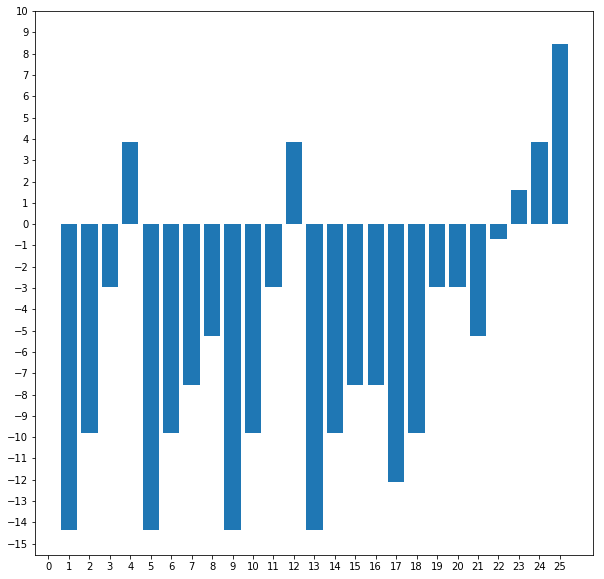

In [101]:
# Write an R/Python script which calculates the annualized return of chit fund participant?
x = data2['Month']
y = data2['Percentage']
plt.figure(figsize=(10,10))
plt.bar(x, y )
plt.xticks(np.arange(0,26,1))
plt.yticks(np.arange(-15,11,1))